In [2]:
from __future__ import division, print_function, absolute_import 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import BatchNormalization 
from keras.optimizers import SGD 
import keras.backend as K 
import keras.utils

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
nb_classes = 10
(X_train, y_train),(X_test, y_test)=mnist.load_data()
print("X train original shape", X_train.shape)
print("y train original shape", y_train.shape)


X train original shape (60000, 28, 28)
y train original shape (60000,)


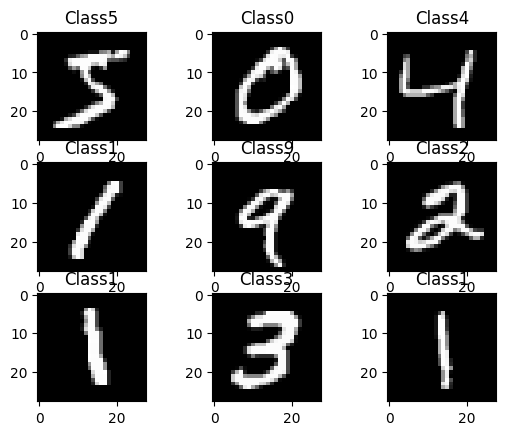

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class{}".format(y_train[i]))

plt.show()

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
def alexnet():
    model = Sequential()
    model.add(Conv2D(64,(3,3), padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,(7,7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(256,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1,1)))

    model.add(Flatten())
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(4096))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    return model

In [8]:
model = alexnet()
optim = SGD(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['acc'])

c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.fit(X_train.reshape(60000, 28, 28, 1), Y_train, batch_size=50, epochs=3, validation_data= (X_test.reshape(10000, 28, 28,1),Y_test),verbose=1)

Epoch 1/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 893s 743ms/step - acc: 0.6682 - loss: 1.2628 - val_acc: 0.9256 - val_loss: 0.6143
Epoch 2/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 663s 550ms/step - acc: 0.9074 - loss: 0.6999 - val_acc: 0.9464 - val_loss: 0.5374
Epoch 3/3
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 559s 466ms/step - acc: 0.9305 - loss: 0.6225 - val_acc: 0.9551 - val_loss: 0.4928


In [10]:
#EVALUATE MODEL
score = model.evaluate(X_test.reshape(10000, 28, 28, 1), Y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - acc: 0.9456 - loss: 0.5315


In [11]:
# Predict individual classes
predicted_classes = model.predict(X_test.reshape(10000, 28, 28,1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step


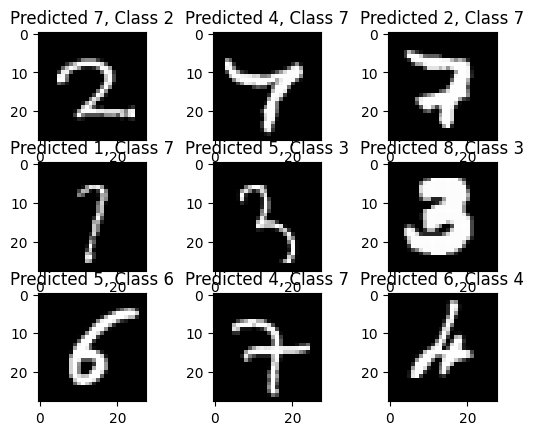

In [16]:
# Get the predicted class labels by taking argmax of predicted probabilities
predicted_labels = np.argmax(predicted_classes, axis=1)

# Find indices where predictions were incorrect
incorrect_indices = np.where(predicted_labels != y_test)[0]

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_labels[incorrect], y_test[incorrect]))
plt.show()

In [17]:
# plt.figure()
# for i, incorrect in enumerate(incorrect_indices[:9]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(X_test [incorrect].reshape(28,28), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format (predicted_classes [incorrect],y_test[incorrect]))
# plt.show()

In [18]:
# Save Model
model.save("myAlexNetModel.keras")

## 1. Importing the libraries

In [19]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [ ]:
# load file names

files = glob.glob('dogs-vs-cats//train//dogs/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]

In [48]:
cat_files

['dogs-vs-cats//train/dogs\\dog.0.jpg',
 'dogs-vs-cats//train/dogs\\dog.1.jpg',
 'dogs-vs-cats//train/dogs\\dog.10.jpg',
 'dogs-vs-cats//train/dogs\\dog.100.jpg',
 'dogs-vs-cats//train/dogs\\dog.1000.jpg',
 'dogs-vs-cats//train/dogs\\dog.10000.jpg',
 'dogs-vs-cats//train/dogs\\dog.10001.jpg',
 'dogs-vs-cats//train/dogs\\dog.10002.jpg',
 'dogs-vs-cats//train/dogs\\dog.10003.jpg',
 'dogs-vs-cats//train/dogs\\dog.10004.jpg',
 'dogs-vs-cats//train/dogs\\dog.10005.jpg',
 'dogs-vs-cats//train/dogs\\dog.10006.jpg',
 'dogs-vs-cats//train/dogs\\dog.10007.jpg',
 'dogs-vs-cats//train/dogs\\dog.10008.jpg',
 'dogs-vs-cats//train/dogs\\dog.10009.jpg',
 'dogs-vs-cats//train/dogs\\dog.1001.jpg',
 'dogs-vs-cats//train/dogs\\dog.10010.jpg',
 'dogs-vs-cats//train/dogs\\dog.10011.jpg',
 'dogs-vs-cats//train/dogs\\dog.10012.jpg',
 'dogs-vs-cats//train/dogs\\dog.10013.jpg',
 'dogs-vs-cats//train/dogs\\dog.10014.jpg',
 'dogs-vs-cats//train/dogs\\dog.10015.jpg',
 'dogs-vs-cats//train/dogs\\dog.10016.jpg',
 'd

In [ ]:
dog_files

In [45]:
# length of cat and dog files
len(cat_files),len(dog_files)

(12500, 12500)

# Training set

In [ ]:
# choose a random set of 1500 images for training dataset
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)

# subtract the training set from the original dataset
cat_files = np.setdiff1d(cat_files, cat_train)
dog_files = np.setdiff1d(dog_files, dog_train)

# Validation Set

In [ ]:
# validation dataset
cat_val = np.random.choice(cat_train, size=500, replace=False)
dog_val = np.random.choice(dog_train, size=500, replace=False)

# subtract the validation set from the training set
cat_files = np.setdiff1d(cat_files, cat_val)
dog_files = np.setdiff1d(dog_files, dog_val)

# Test Set

In [ ]:
# Test set
cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)